# AdaBoost (Adaptive Boosting) — From Scratch

In this notebook, we implement **AdaBoost**, a powerful boosting algorithm, from scratch using NumPy only.

We will:

- Create a binary dataset  
- Implement a Decision Stump (weak learner)  
- Implement AdaBoost step-by-step  
- Visualize the decision boundary  
- Evaluate model accuracy  

AdaBoost improves performance by focusing on **hard-to-classify points**.


##  What is AdaBoost?

AdaBoost combines multiple **weak learners (decision stumps)** into a **strong classifier**.

Final classifier:

$$
F(x) = \sum_{t=1}^{T} \alpha_t h_t(x)
$$

Weight update rule:

$$
w_i \leftarrow w_i \exp(-\alpha_t y_i h_t(x_i))
$$

Misclassified points get **higher** weight.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
np.random.seed(42)

## 1. Create a Synthetic Dataset

We generate a dataset that is **not linearly separable**, ideal for AdaBoost.

In [2]:
N = 200
X = np.random.randn(N, 2)
y = np.where(X[:,0]**2 + X[:,1] > 1, 1, -1)

## 2. Visualize Dataset

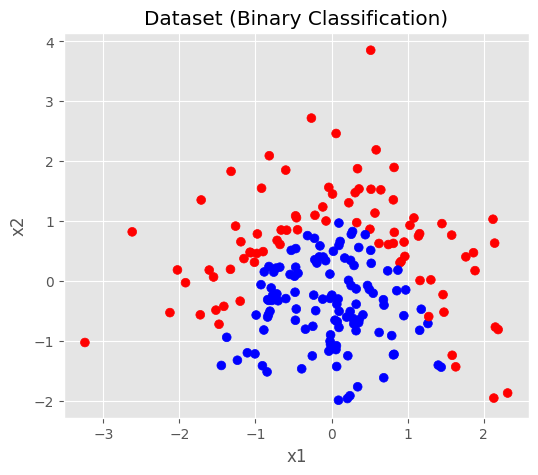

In [3]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", s=40)
plt.title("Dataset (Binary Classification)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

## 3. Implement Decision Stump

In [4]:
class DecisionStump:
    def __init__(self):
        self.feature = None
        self.threshold = None
        self.polarity = 1

    def predict(self, X):
        preds = np.ones(X.shape[0])
        if self.polarity == 1:
            preds[X[:, self.feature] < self.threshold] = -1
        else:
            preds[X[:, self.feature] >= self.threshold] = -1
        return preds

## 4. Implement AdaBoost Algorithm

In [5]:
def adaboost(X, y, T=20):
    N, d = X.shape
    w = np.ones(N) / N

    stumps = []
    alphas = []

    for _ in range(T):
        stump = DecisionStump()
        min_error = float('inf')

        # Try all features + all thresholds
        for feature in range(d):
            for threshold in np.unique(X[:, feature]):
                for polarity in [1, -1]:
                    preds = np.ones(N)
                    if polarity == 1:
                        preds[X[:, feature] < threshold] = -1
                    else:
                        preds[X[:, feature] >= threshold] = -1

                    error = np.sum(w * (preds != y))

                    if error < min_error:
                        min_error = error
                        stump.feature = feature
                        stump.threshold = threshold
                        stump.polarity = polarity

        eps = 1e-10
        alpha = 0.5 * np.log((1 - min_error) / (min_error + eps))

        preds = stump.predict(X)

        w *= np.exp(-alpha * y * preds)
        w /= np.sum(w)

        stumps.append(stump)
        alphas.append(alpha)

    return stumps, alphas


## 5. Train AdaBoost


In [6]:
T = 15
stumps, alphas = adaboost(X, y, T)

## 6. Prediction Function

In [7]:
def adaboost_predict(X, stumps, alphas):
    final = np.zeros(X.shape[0])
    for stump, alpha in zip(stumps, alphas):
        final += alpha * stump.predict(X)
    return np.sign(final)

## 7. Evaluate Accuracy


In [8]:
y_pred = adaboost_predict(X, stumps, alphas)
accuracy = np.mean(y_pred == y)

print(f"AdaBoost Accuracy: {accuracy:.3f}")


AdaBoost Accuracy: 0.960


## 8. Visualize Decision Boundary


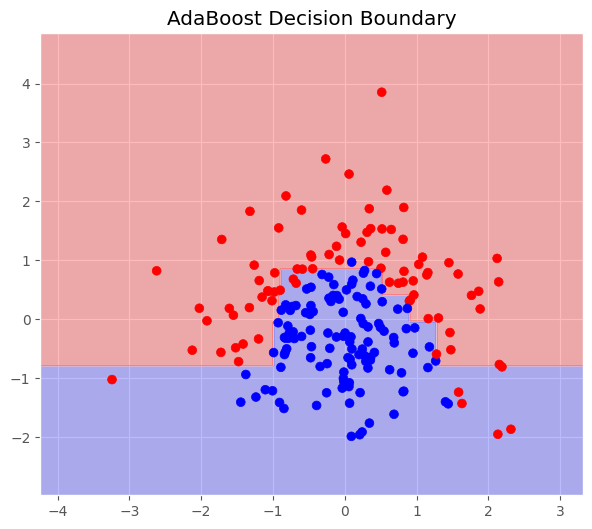

In [9]:
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_preds = adaboost_predict(grid, stumps, alphas).reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, grid_preds, cmap="bwr", alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", s=40)
plt.title("AdaBoost Decision Boundary")
plt.show()